# Advanced Regression Assignment - Surprise Housing - Price Prediction


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

1. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## 1. Project Setup

In [1]:
# Import relevant libraries, set appropriate configurations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Scalers
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score, mean_squared_error

# Stats for Utilities like z_score
from scipy import stats

# Sane configurations
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.3f}".format


%matplotlib inline


In [2]:
# Read the data
df = pd.read_csv('./train.csv', na_filter = False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## 2. Data Exploration & EDA 

In [3]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000",...,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,"10,516.828",6.099,5.575,"1,971.268","1,984.866",443.640,46.549,567.240,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,421.610,42.301,"9,981.265",1.383,1.113,30.203,20.645,456.098,161.319,441.867,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,1.000,20.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,365.750,20.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,223.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,730.500,50.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",383.500,0.000,477.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,"1,095.250",70.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",712.250,0.000,808.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,"1,460.000",190.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","5,644.000","1,474.000","2,336.000",...,857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [5]:


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

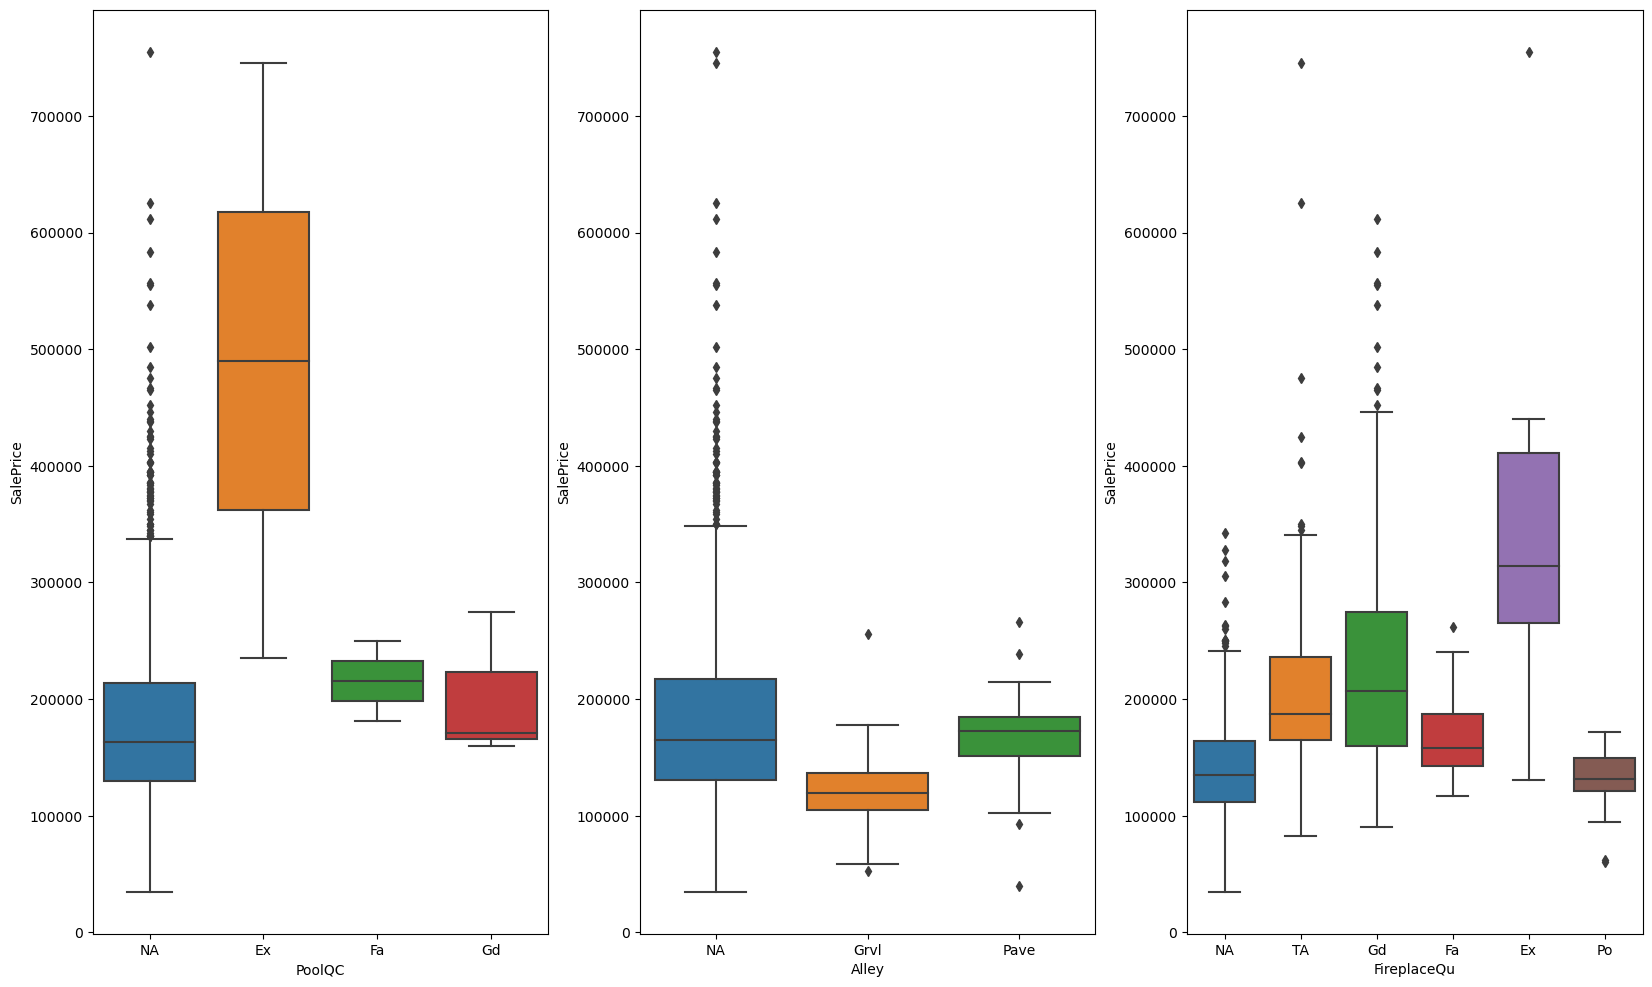

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'PoolQC', y ='SalePrice', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'Alley', y ='SalePrice', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'FireplaceQu', y ='SalePrice', data = df)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

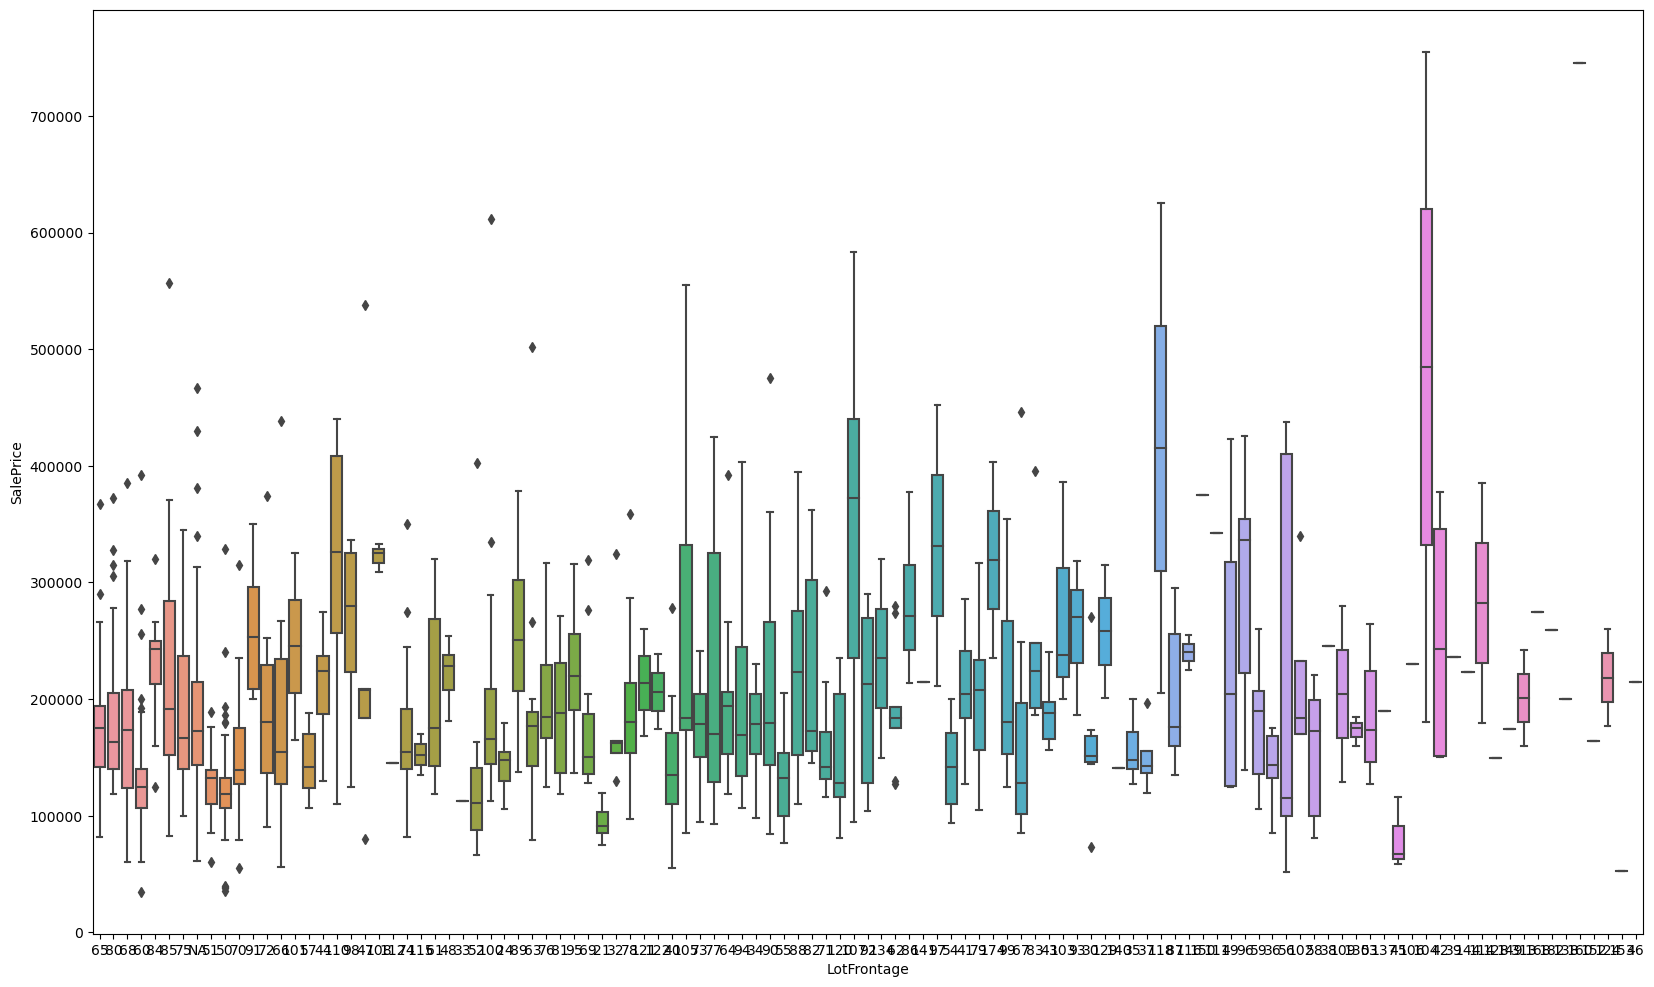

In [7]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'LotFrontage', y ='SalePrice', data = df)


In [8]:
# What should be the correct Type of the fields?
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      int64
OverallQual     int64
OverallCond     int64
LotFrontage    object
MasVnrArea     object
dtype: object

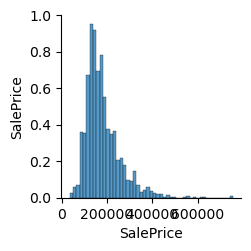

In [9]:
# Can we find any trends by plotting the numerical variables with the count?
numerical_vars=["SalePrice","LotFrontage","GarageYrBlt","MasVnrArea"]

# Create a pairplot with the numerical variables
sns.pairplot(df[numerical_vars])
plt.show()

### Data Pre-Processing

#### Handle Missing Values

In [10]:
# Let us fix 'NA' values in the LotFrontage.
# Let's replace the NA values with median value.
pd.to_numeric(df['LotFrontage'], errors='coerce').median()

69.0

In [11]:
df['LotFrontage'] = df.LotFrontage.replace('NA',69)

In [12]:
# Fixing the MasVnrArea
# Wherever there is no Masonry Veneer, let us replace the area with a zero value
df['MasVnrArea'] = df.MasVnrArea.replace('NA',0)

Now that we have replaced the values for 'NA', let us convert these two fields in to numeric types

In [13]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000",...,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,69.864,"10,516.828",6.099,5.575,"1,971.268","1,984.866",103.117,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,421.610,42.301,22.028,"9,981.265",1.383,1.113,30.203,20.645,180.731,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,1.000,20.000,21.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,365.750,20.000,60.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,730.500,50.000,69.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,"1,095.250",70.000,79.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",164.250,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,"1,460.000",190.000,313.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","1,600.000","5,644.000",...,857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


In [15]:
df[['MasVnrArea', 'LotFrontage']].dtypes

MasVnrArea     int64
LotFrontage    int64
dtype: object

In [16]:
df[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,"1,460.000","1,460.000"
mean,69.864,103.117
std,22.028,180.731
min,21.000,0.000
25%,60.000,0.000
50%,69.000,0.000
75%,79.000,164.250
max,313.000,"1,600.000"


##### Now let us look at what to do with the GarageYrBlt field

In [17]:
df[['GarageYrBlt']].describe()

,GarageYrBlt
count,1460
unique,98
top,NA
freq,81


In [18]:
# GaragYrBlt is another field that has NA values.  These are because if the house does not have a garage, then the value will be NA.
# But if we want to conver this in to a numeric field, we need to fill some value.  So those cases of NA, we are going to fill with
# median value of GarageYrBlt


pd.to_numeric(df['GarageYrBlt'], errors='coerce').median()

1980.0

In [19]:
# Median Value of GarageYrBlt (ignoring the existing NA values) is 1980.  So we replace the NA values with 1980
df['GarageYrBlt'] = df.GarageYrBlt.replace('NA',1980)

In [20]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea
count,"1,460.000","1,460.000"
mean,69.864,103.117
std,22.028,180.731
min,21.000,0.000
25%,60.000,0.000
50%,69.000,0.000
75%,79.000,164.250
max,313.000,"1,600.000"


In [21]:
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')

In [22]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

In [23]:
# There seems to be one value with NA.  Let us replace it with the most occuring value : SBrkr
df['Electrical'] = df.Electrical.replace('NA','SBrkr')

In [24]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

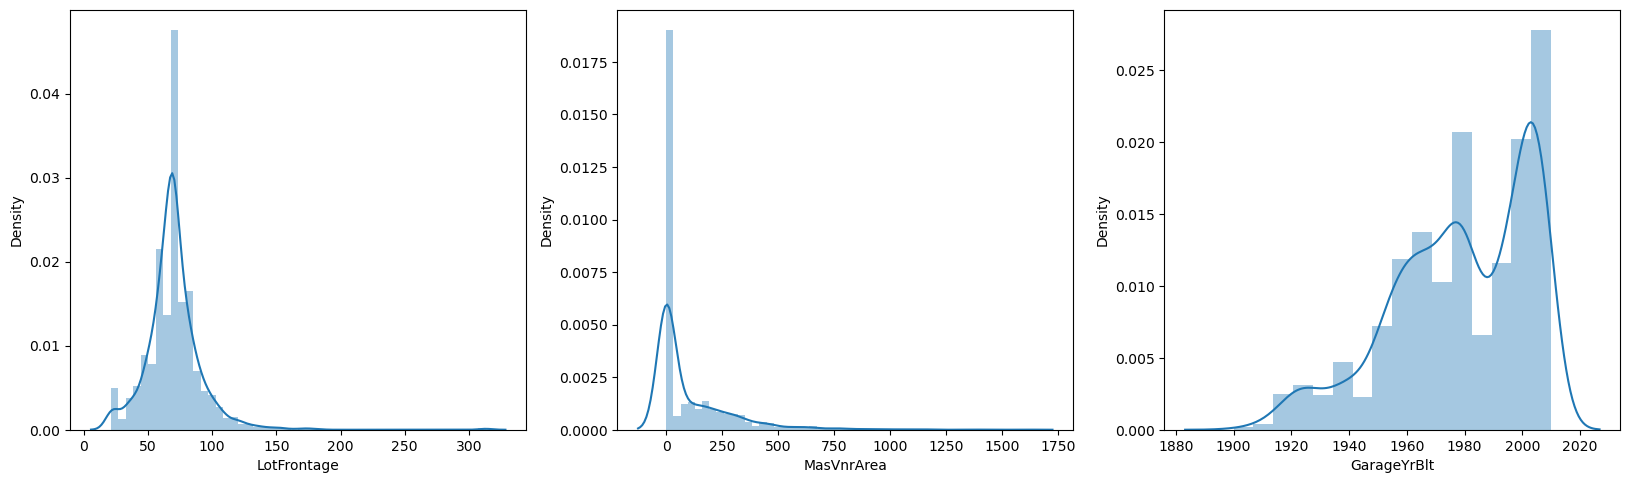

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(df['GarageYrBlt'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [27]:
# Find the top 10 columns that have missing values.
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id             0.000
CentralAir     0.000
GarageYrBlt    0.000
GarageType     0.000
FireplaceQu    0.000
Fireplaces     0.000
Functional     0.000
TotRmsAbvGrd   0.000
KitchenQual    0.000
KitchenAbvGr   0.000
dtype: float64

In [28]:
# Looks like there are no missing values.  So we have put appropriate values everywhere.

In [29]:
df.nunique().sort_values()

CentralAir       2
Street           2
Utilities        2
HalfBath         3
PavedDrive       3
              ... 
1stFlrSF       753
BsmtUnfSF      780
GrLivArea      861
LotArea       1073
Id            1460
Length: 81, dtype: int64

In [30]:
## Check for missing values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [31]:
# Replace Numbers with Text for Categorical Variables
# Helps in creating dummy variables with relevant names
df['MSSubClass']=df['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
        150:'1-1/2 STORY PUD - ALL AGES',
        160:'2-STORY PUD - 1946 & NEWER',
        180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
        190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual']=df['OverallQual'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})
df['OverallCond']=df['OverallCond'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})

### Analysis of Target Variable

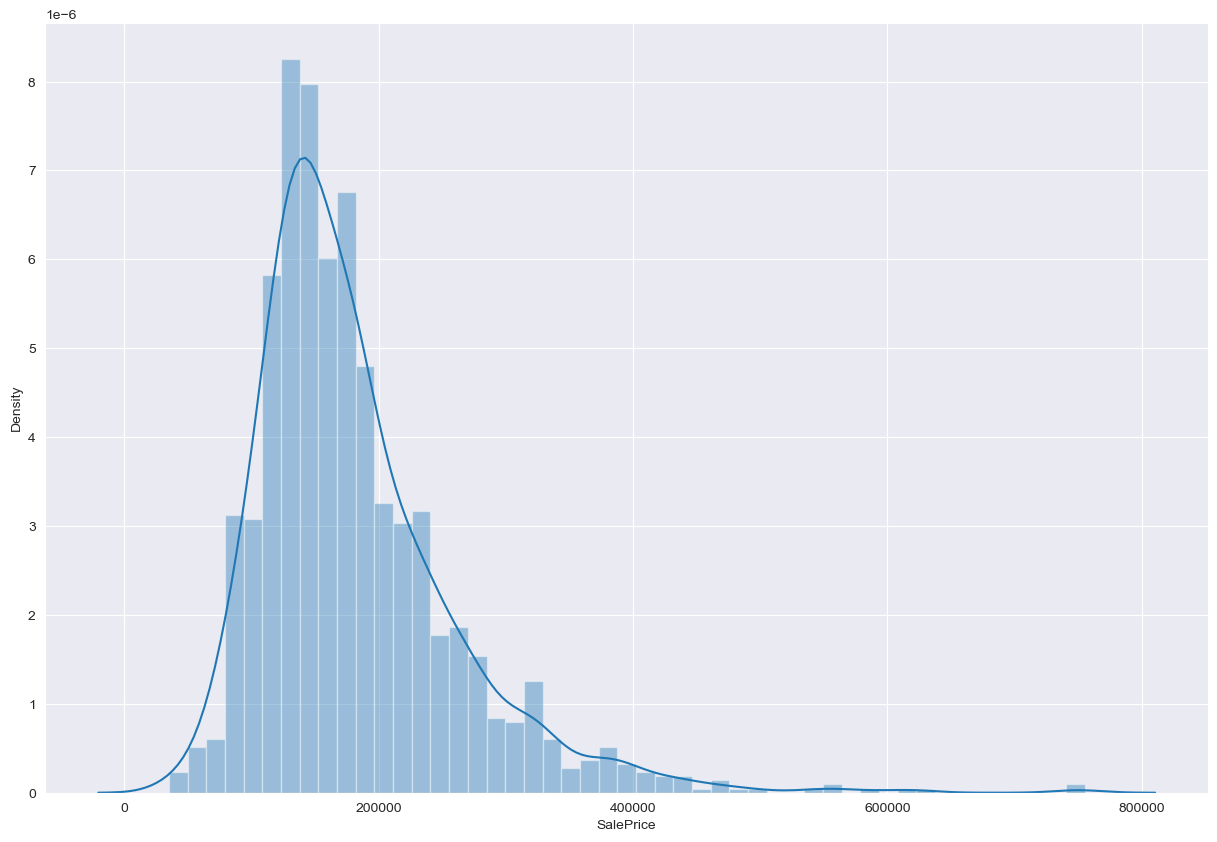

In [32]:
# Let's have a look at the target variable
plt.figure(figsize=[15,10])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [33]:
df['SalePrice'].skew()

1.8828757597682129

**Observation**
  
With a skew value of 1.88, and a graph that has a long tail to the right.  Looks like the target variable is right skewed
  
  


In [34]:
# The adjustment to be done here is to log transform the target variable 
df['SalePrice'] = np.log(df['SalePrice'])

In [35]:
# Has the skew changed?
df['SalePrice'].skew()

0.12133506220520406

**Note**
  
This has fixed the skew.  We can also look at the plot of the sale price
  
  


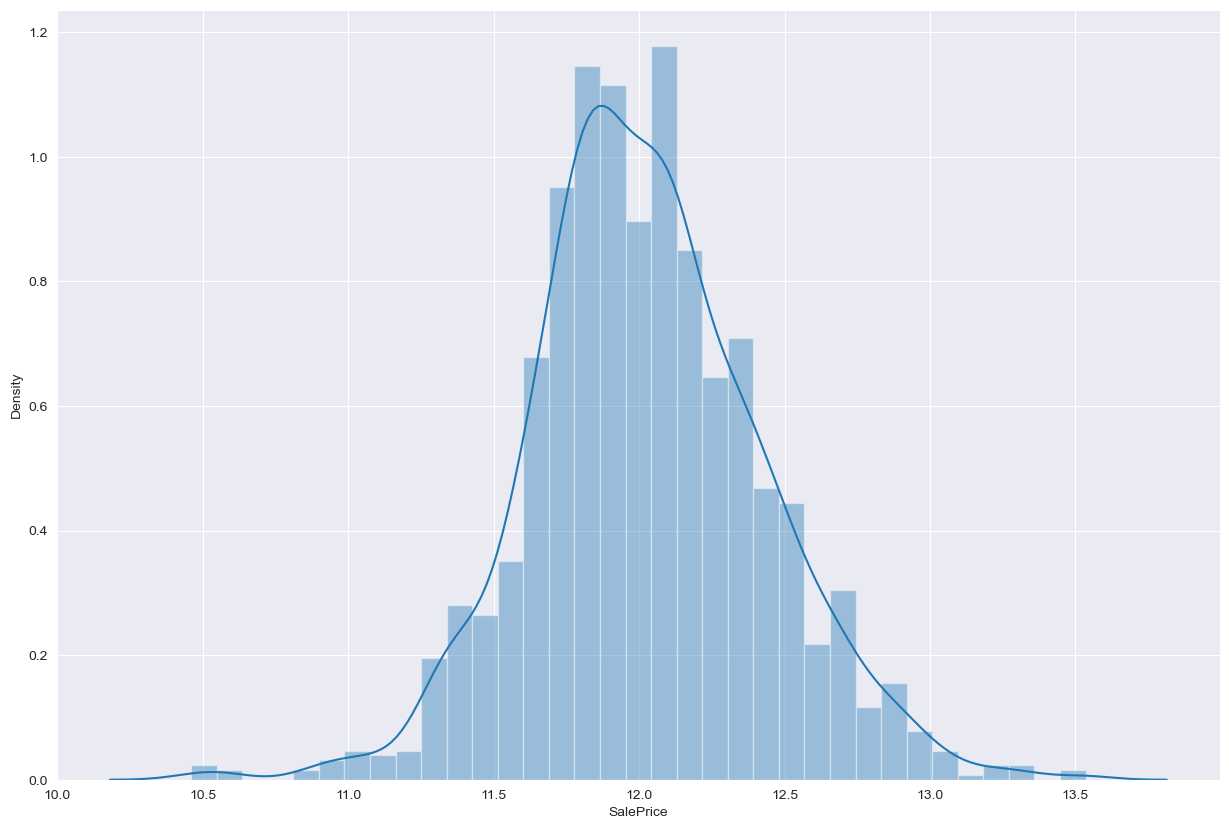

In [36]:
# Let's have a look at the target variable, again
plt.figure(figsize=[15,10])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [37]:
# Seems to have been fixed now.

### Exploratory Data Analysis

In [38]:
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### Univariate Analysis

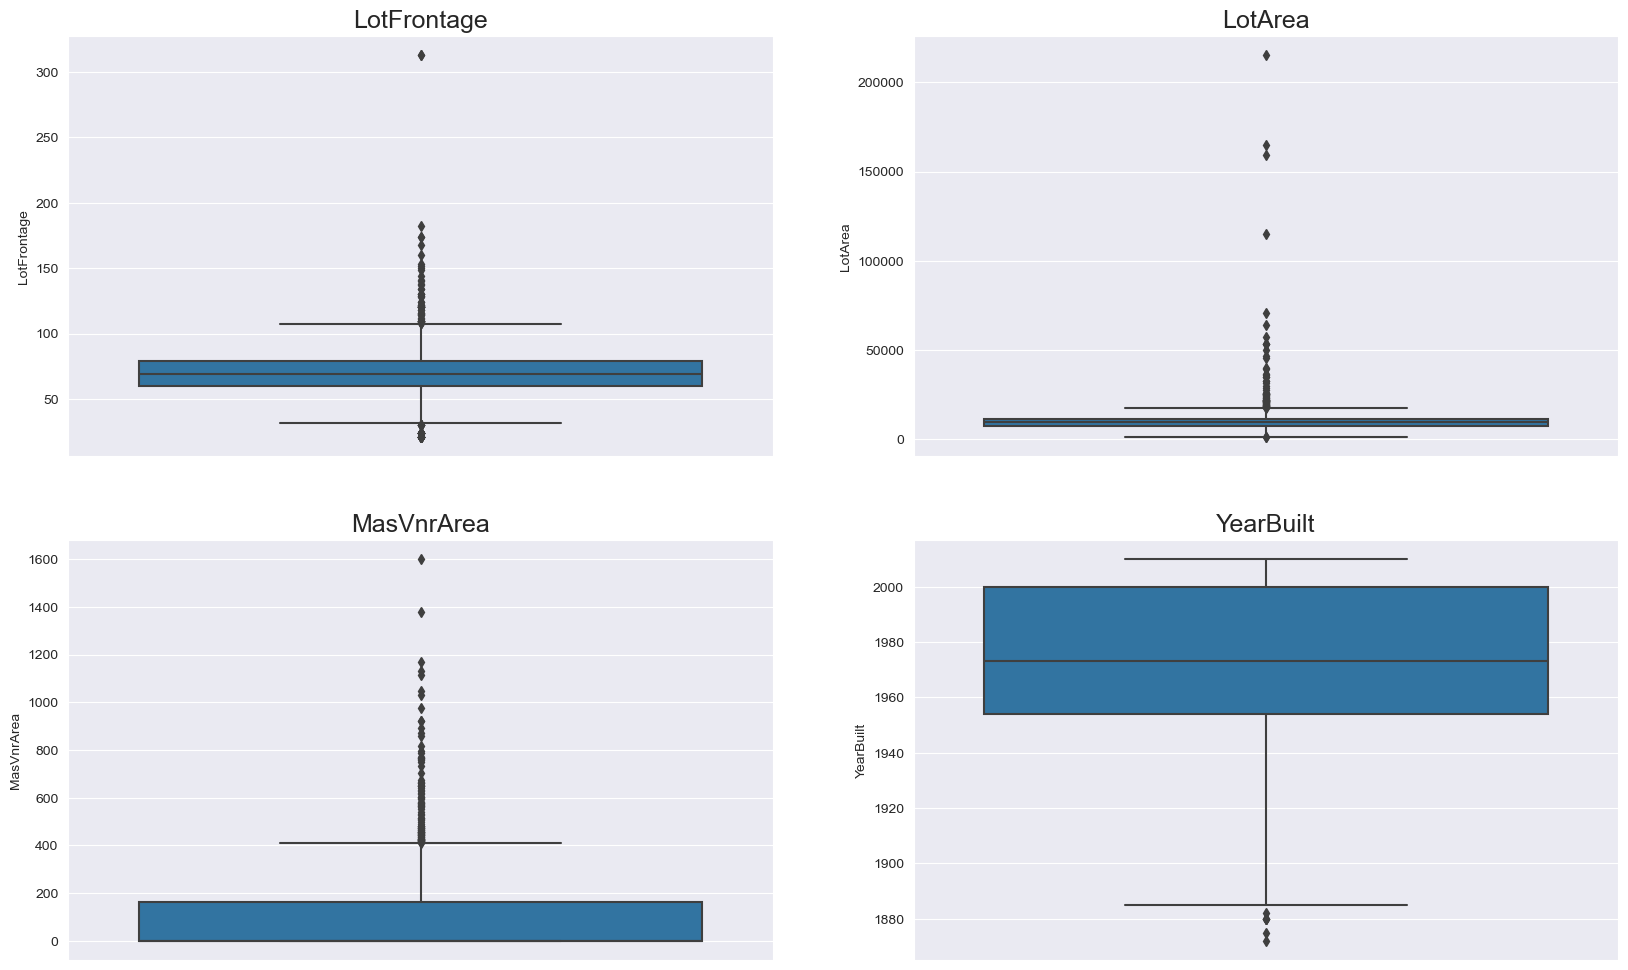

In [39]:
# Let us plot some of the numeric attributes and see if there are any patterns
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y='LotFrontage', data=df)
plt.title('LotFrontage', fontdict={'fontsize': 18})

plt.subplot(2,2,2)
sns.boxplot(y='LotArea', data=df)
plt.title('LotArea', fontdict={'fontsize': 18})

plt.subplot(2,2,3)
sns.boxplot(y='MasVnrArea', data=df)
plt.title('MasVnrArea', fontdict={'fontsize': 18})

plt.subplot(2,2,4)
sns.boxplot(y='YearBuilt', data=df)
plt.title('YearBuilt', fontdict={'fontsize': 18})


plt.show()

**Note**   
     
📍 A lot of attributes have outliers.  We will need to do outlier treatment later

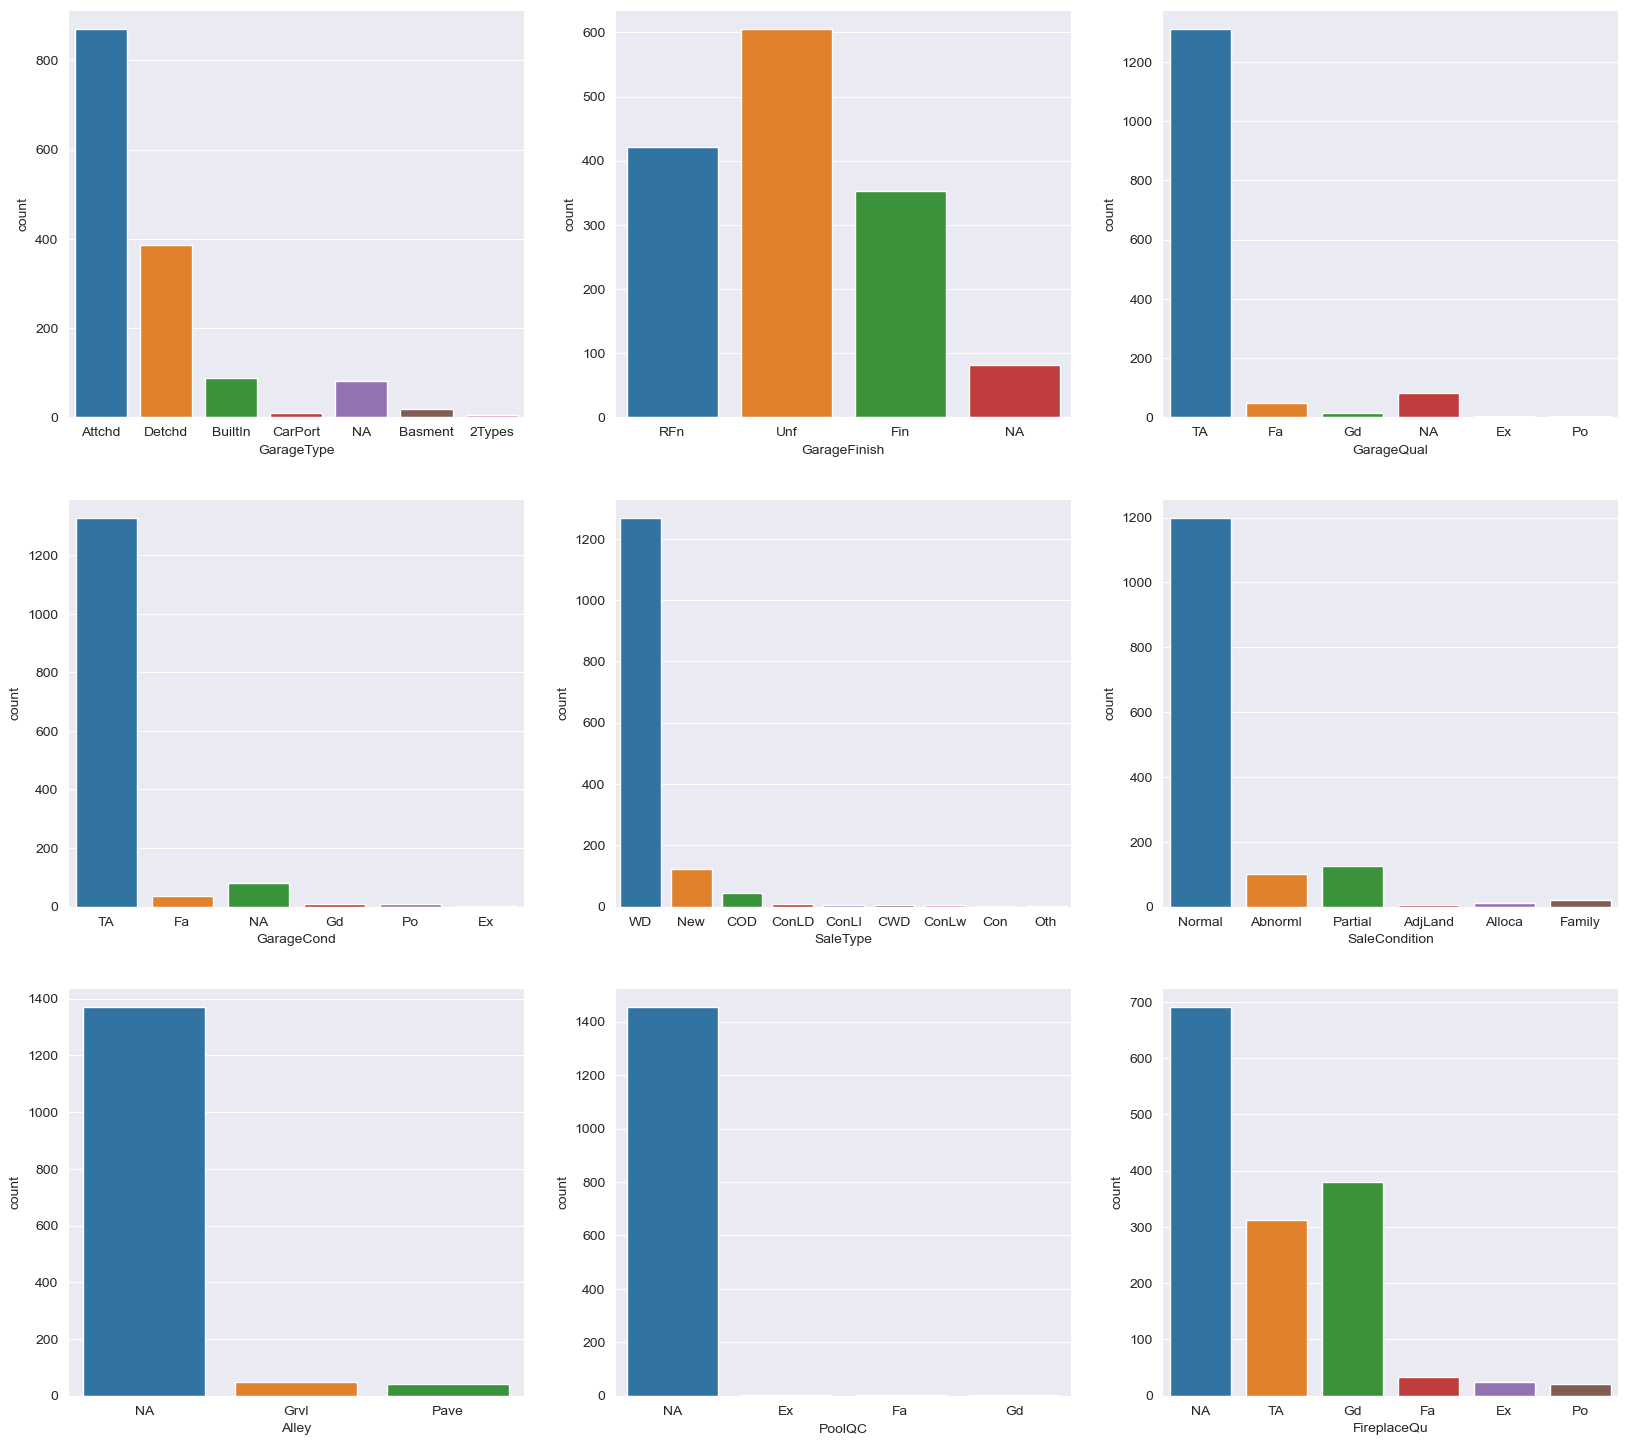

In [40]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.countplot(x = 'GarageType',  data = df)
plt.subplot(3,3,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(3,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(3,3,4)
sns.countplot(x = 'GarageCond', data = df)
plt.subplot(3,3,5)
sns.countplot(x = 'SaleType',  data = df)
plt.subplot(3,3,6)
sns.countplot(x = 'SaleCondition', data = df)
plt.subplot(3,3,7)
sns.countplot(x = 'Alley', data = df)
plt.subplot(3,3,8)
sns.countplot(x = 'PoolQC', data = df)
plt.subplot(3,3,9)
sns.countplot(x = 'FireplaceQu', data = df)
plt.show()

&#x2139; —  **Note** 
     
📍 Some attributes have a huge skew in terms of count.  We can drop them


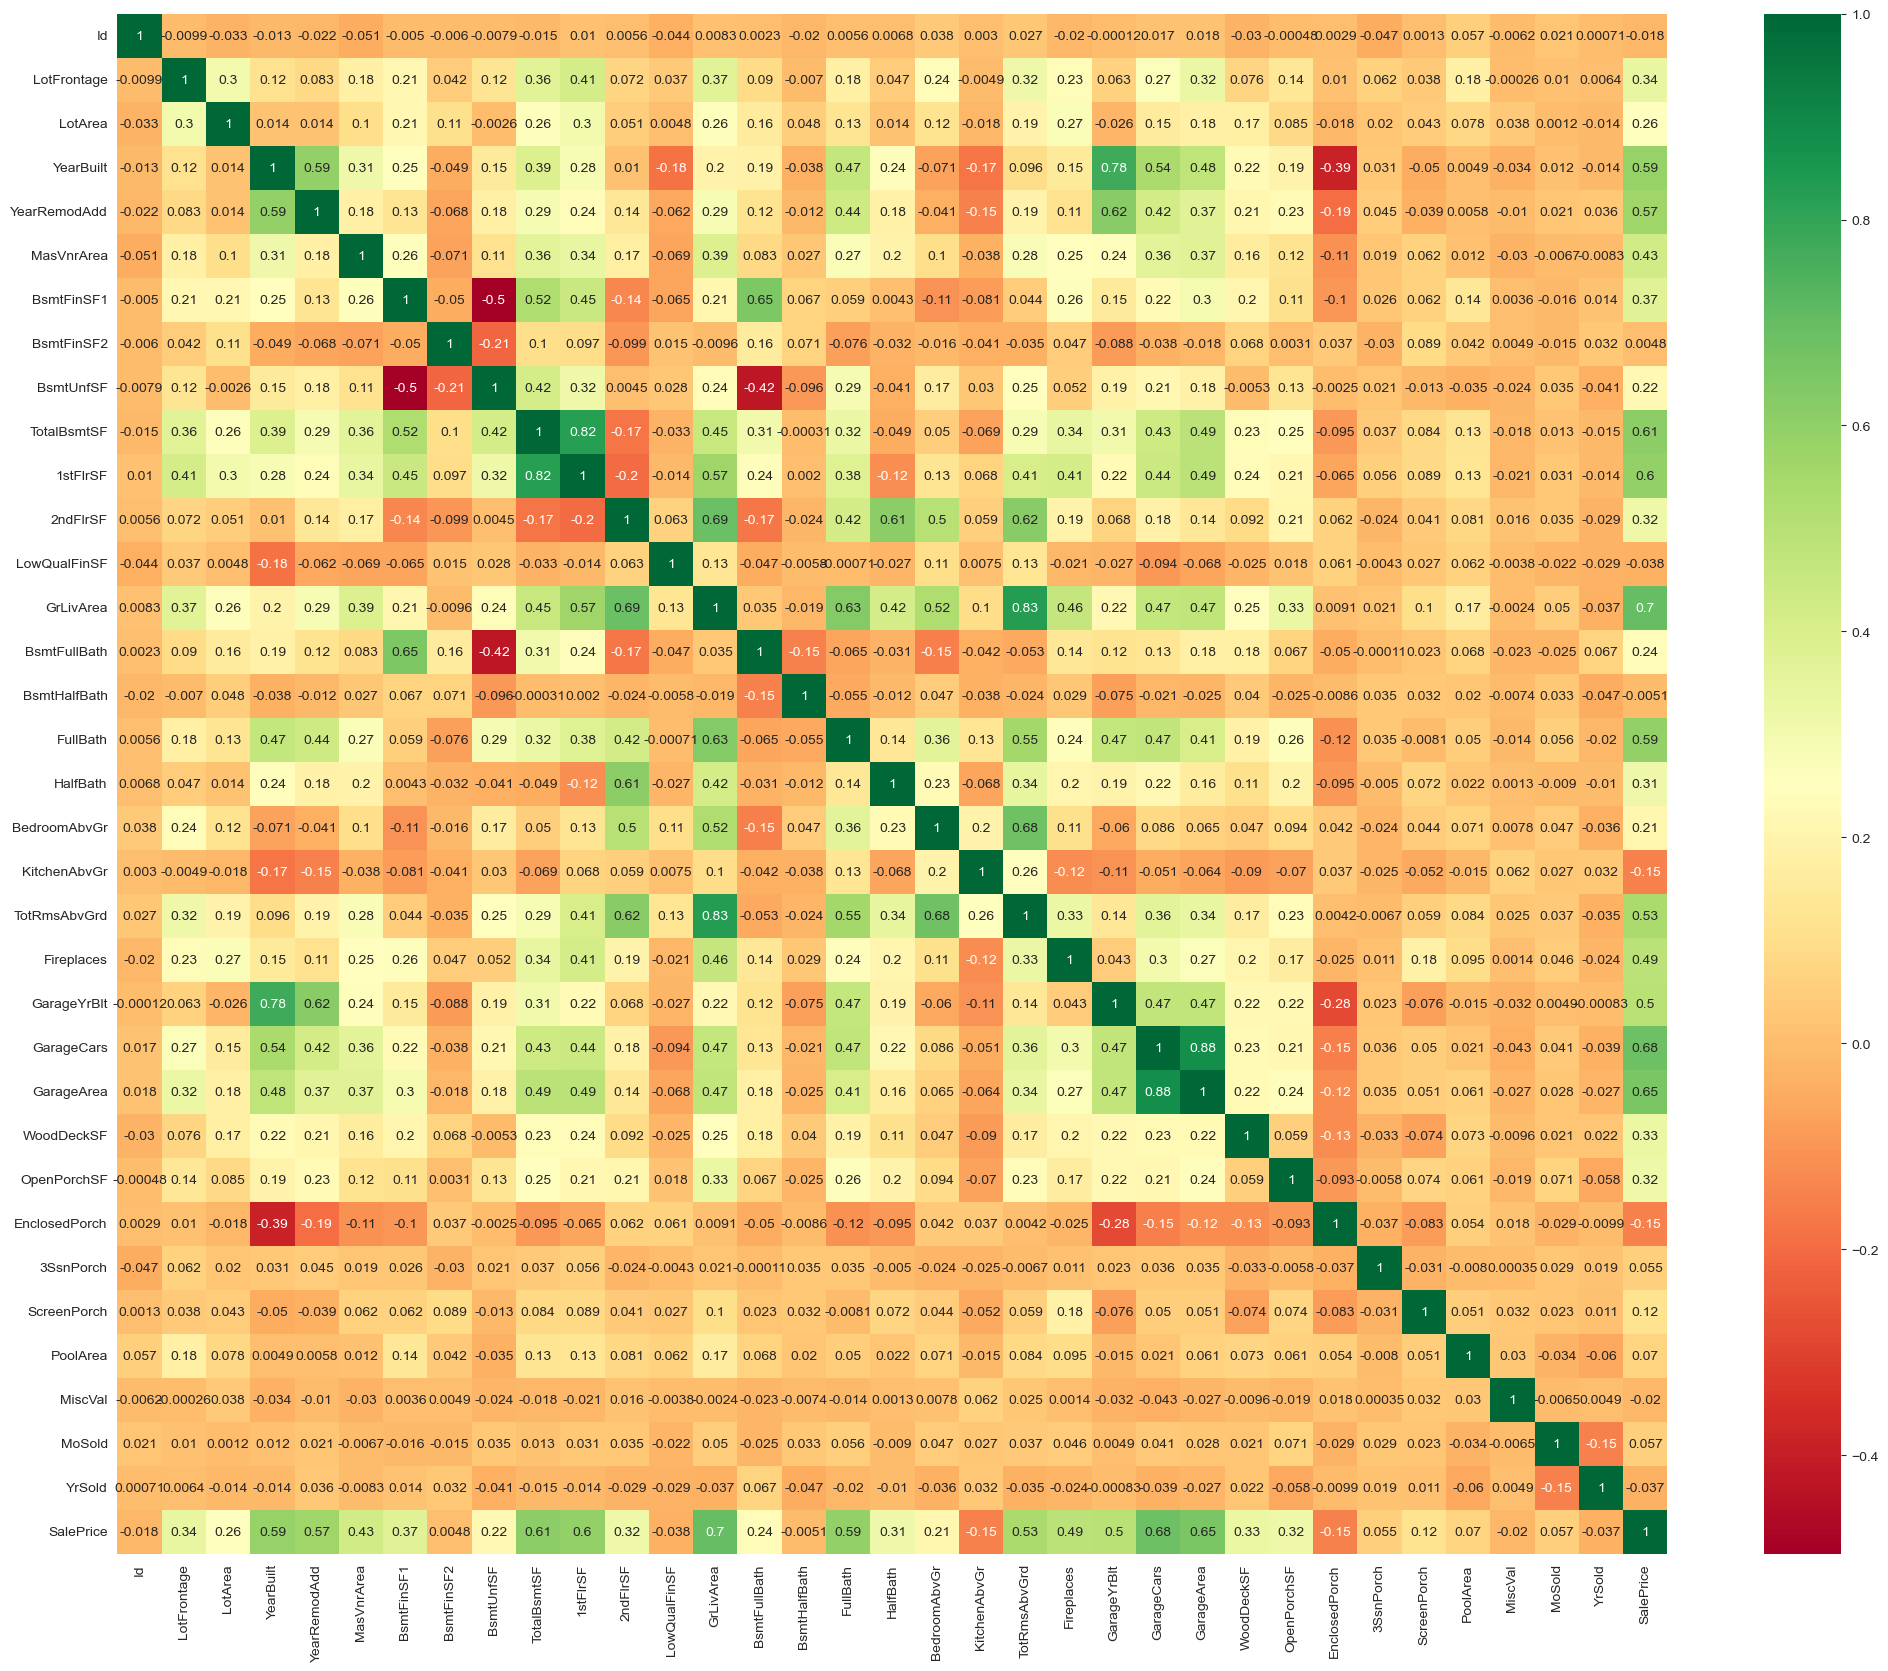

In [41]:
# Let us look at the heat map for correlation

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn');

&#x2139; —  **Note** 
     
📍 Sales price has good correlation with a few variables - GrLivArea, GarageArea, GarageCars, TotalBsmtSf, YearBuilt
    
📍 But there is also correlation between the feature variables as well (multicolinearity).  This will have to be handled.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [43]:
df.drop('Id',axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

#### Dummy Variable Creation

In [45]:
# Let us create dummy variable for the categorical fields

In [46]:
df_categorical_fields = df.select_dtypes(include=['object'])
df_categorical_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [47]:
df_categorical_dummies = pd.get_dummies(df_categorical_fields, drop_first=True)
df_categorical_dummies

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Handling Outliers

In [48]:
# We saw outliers when we did EDA earlier.  
# Let us handle them here
df_numerical_variables = df.select_dtypes(include=['int64', 'float64'])
df_numerical_variables.shape

(1460, 34)

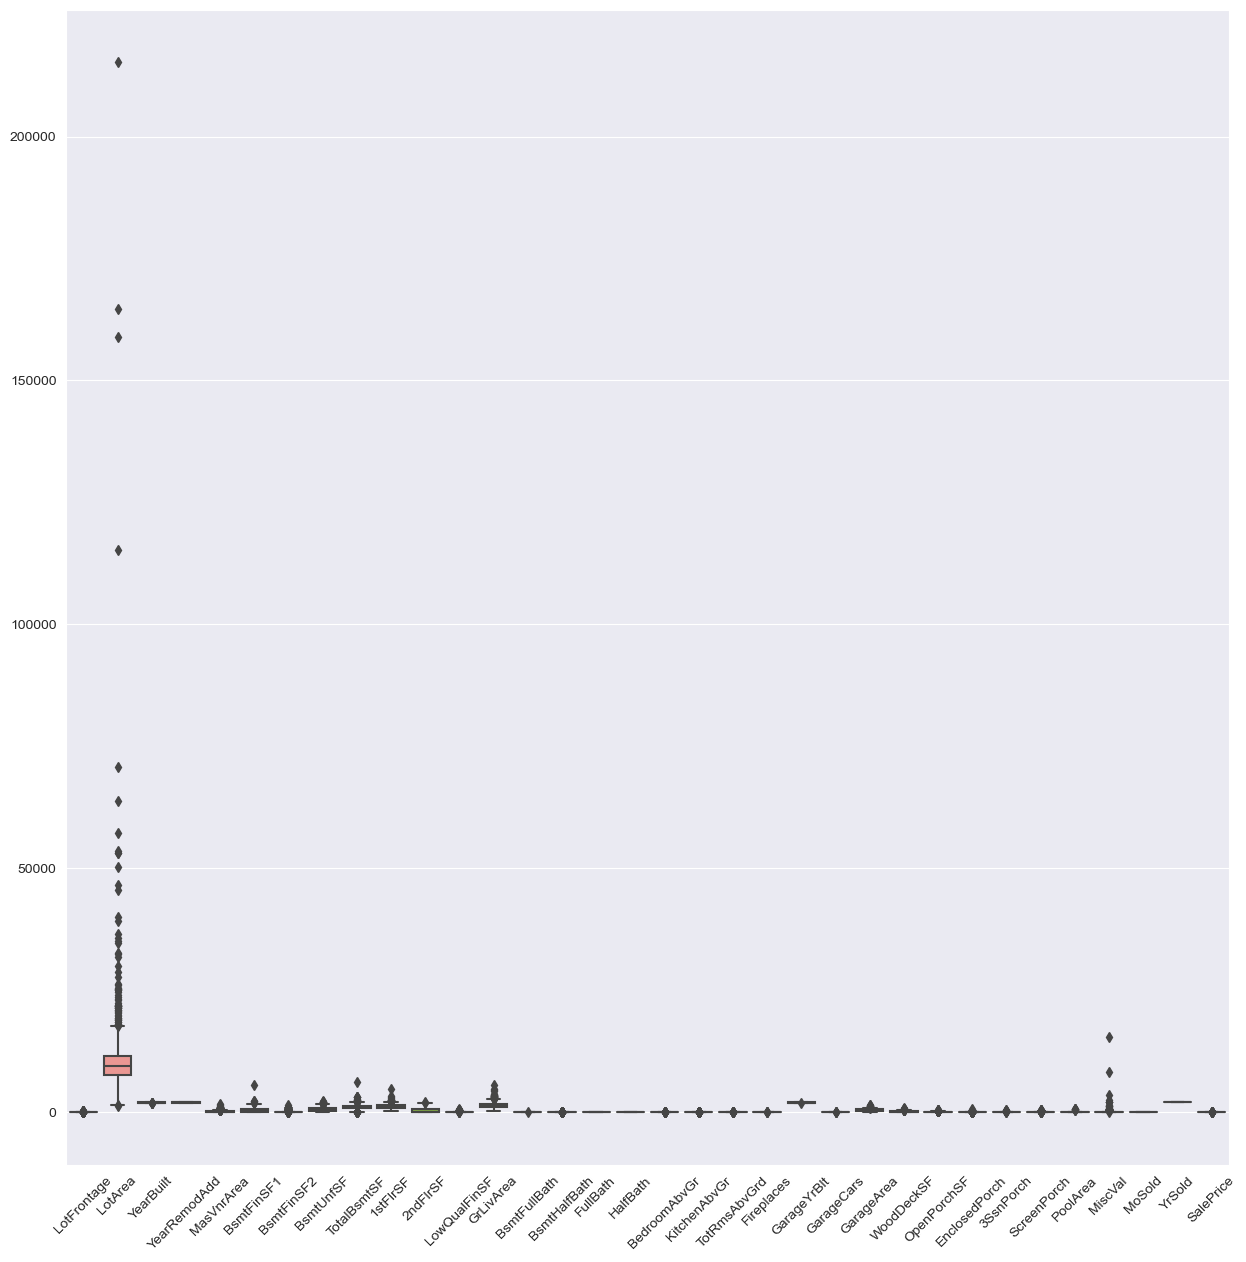

In [49]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=45)
sns.boxplot(data=df_numerical_variables);

In [50]:
# Let us remove all rows that are outsize 95th percentile of the distribution
# df_numerical_variables[(np.abs(stats.zscore(df_numerical_variables)) < 3).all(axis=1)]

In [51]:
# We tried to drop the rows that have at least 1 value that is an outlier for that column
# It drops too many rows (there are only 1037 rows left after dropping)
# So let us cap the values at 5th and 95th percentile respectively.

In [52]:
# Let us cap the values
quantiles = df_numerical_variables.quantile([0.05, 0.95])

df_numerical_variables = df_numerical_variables.apply(
    lambda x: x.clip(quantiles[x.name][0.05], quantiles[x.name][0.95])
)

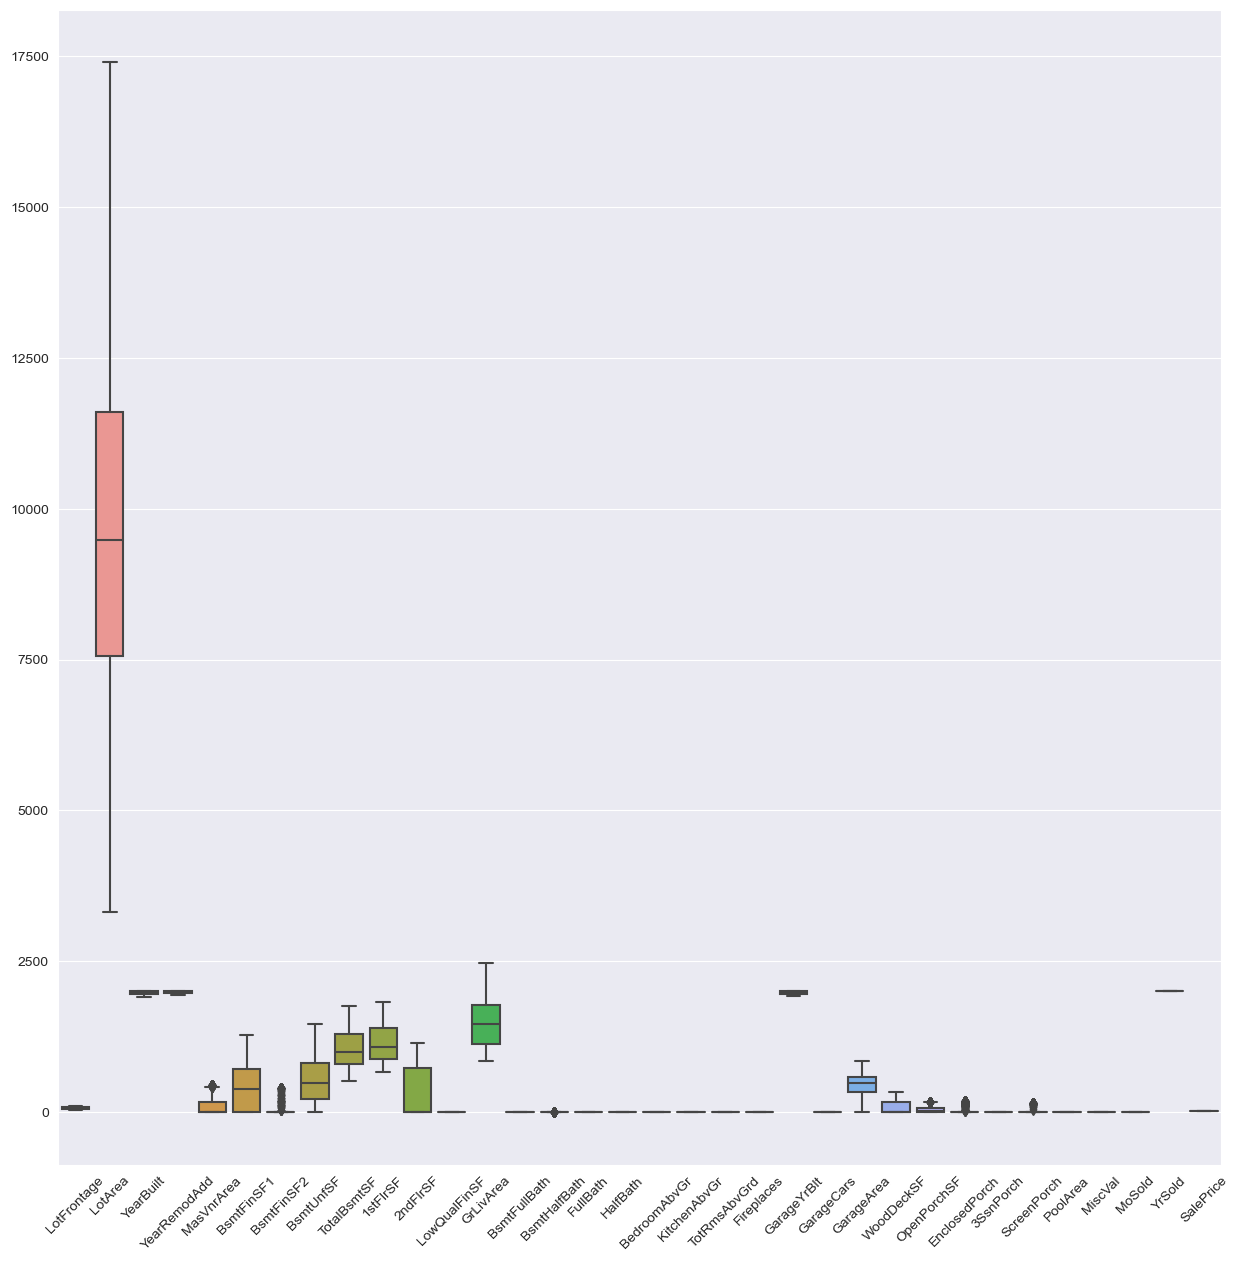

In [53]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=45)
sns.boxplot(data=df_numerical_variables);

&#x2139; —  **Note** 
     
📍 We have removed the outliers now


In [54]:
# Putting together all the fields after outlier handling & dummy variable creation
df = pd.concat([df_numerical_variables, df_categorical_dummies], axis=1)



In [55]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 289 columns):
 #    Column                                                            Dtype  
---   ------                                                            -----  
 0    LotFrontage                                                       float64
 1    LotArea                                                           float64
 2    YearBuilt                                                         int64  
 3    YearRemodAdd                                                      int64  
 4    MasVnrArea                                                        int64  
 5    BsmtFinSF1                                                        int64  
 6    BsmtFinSF2                                                        float64
 7    BsmtUnfSF                                                         int64  
 8    TotalBsmtSF                                                       float64
 9    1stFlr

In [56]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.000,"8,450.000",2003,2003,196,706,0.000,150,856.000,856.000,...,0,0,0,0,1,0,0,0,1,0
1,80.000,"9,600.000",1976,1976,0,978,0.000,284,"1,262.000","1,262.000",...,0,0,0,0,1,0,0,0,1,0
2,68.000,"11,250.000",2001,2002,162,486,0.000,434,920.000,920.000,...,0,0,0,0,1,0,0,0,1,0
3,60.000,"9,550.000",1916,1970,0,216,0.000,540,756.000,961.000,...,0,0,0,0,1,0,0,0,0,0
4,84.000,"14,260.000",2000,2000,350,655,0.000,490,"1,145.000","1,145.000",...,0,0,0,0,1,0,0,0,1,0


#### Derived Features

In [57]:
# Age of a house is more intutive and easy to interpret than the year built and year sold.
# Let us create a derived variable for age of house

df['Age'] = df['YrSold'] - df['YearBuilt']

# YrSold & YearBuilt are now redundant
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

### Ridge & Lasso using GridsearchCV

#### Ridge Regression

In [58]:
# Define helper function to calculate some metrices
def calculate_metrices(y_train, y_train_pred, y_test, y_pred):
    metrics_dict = {}

    # R-squared of train and test data
    metrics_dict['R-Squared'] = [r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)]

    # Residual sum of squares of train and test data
    metrics_dict['RSS'] = [np.sum(np.square(y_train - y_train_pred)), np.sum(np.square(y_test - y_pred))]

    # Mean Squared Error of train and test data
    metrics_dict['MSE'] = [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)]

    # Root Mean Squared Error for train and test data
    metrics_dict['RMSE'] = [np.sqrt(metrics_dict['MSE'][0]), np.sqrt(metrics_dict['MSE'][1])]

    metrics_df = pd.DataFrame(metrics_dict, index=['Train', 'Test']).transpose()
    return metrics_df

In [59]:
# Helper Function to print the top n beta coefficients
def print_top_n_beta_coefficients(top_n, model, columns):
    beta_coeffs = pd.DataFrame(model.coef_, columns=['Beta Coefficients'], index=columns)
    beta_coeffs.loc['Intercept'] = model.intercept_                               # Include intercept if needed

    # print(ridge_beta_coeffs.sort_values(by='Beta Coefficients',ascending=False).head(n=20))

    important_coeffs = beta_coeffs.copy()                                         # Create a copy of coefficients DataFrame
    important_coeffs['Absolute'] = important_coeffs['Beta Coefficients'].abs()    # Add a column for absolute values
    important_coeffs = important_coeffs.nlargest(top_n, 'Absolute')               # Select top '12' based on absolute values
    print(important_coeffs)                                                       # Print the important coefficients

In [60]:
# Split the data in to test & train sets

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [61]:
df_train.shape

(1021, 288)

In [62]:
df_test.shape

(439, 288)

In [63]:
norm_scaler = MinMaxScaler()
scalar_vars = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
df_train[scalar_vars] = norm_scaler.fit_transform(df_train[scalar_vars])

In [64]:
df_train.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
count,"1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000",...,"1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000","1,021.000"
mean,0.483,0.450,0.612,0.202,0.341,0.087,0.377,0.438,0.417,0.292,...,0.004,0.078,0.003,0.871,0.003,0.008,0.014,0.826,0.078,0.383
std,0.245,0.245,0.360,0.311,0.324,0.262,0.287,0.286,0.292,0.361,...,0.062,0.269,0.054,0.336,0.054,0.088,0.116,0.380,0.269,0.310
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.353,0.294,0.298,0.000,0.000,0.000,0.147,0.222,0.175,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.085
50%,0.486,0.440,0.772,0.000,0.308,0.000,0.315,0.385,0.357,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.362
75%,0.618,0.582,0.947,0.346,0.559,0.000,0.549,0.644,0.647,0.638,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.574
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [65]:
# Preparing the X_train & y_train sets

y_train = df_train.pop('SalePrice')
X_train = df_train

In [66]:
print(X_train.shape)
print(y_train.shape)

(1021, 287)
(1021,)


In [67]:
# Doing GridSearchCV with a range of lambda values

params = {'alpha': [0.001, 0.01, 0.05, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0, 20.0, 50.0, 100.0, 1000.0]}

ridge = Ridge()

# Run the cross-validation
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.5, 1.0, 3.0, 5.0, 7.0,
                                   10.0, 20.0, 50.0, 100.0, 1000.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [68]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head(n=20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012,0.005,0.002,0.001,0.001,{'alpha': 0.001},-0.092,-0.102,-0.102,-0.086,...,-0.093,0.008,12,-0.048,-0.049,-0.049,-0.050,-0.051,-0.049,0.001
1,0.011,0.003,0.002,0.001,0.010,{'alpha': 0.01},-0.090,-0.102,-0.098,-0.086,...,-0.091,0.008,10,-0.048,-0.049,-0.049,-0.050,-0.051,-0.049,0.001
2,0.009,0.003,0.002,0.001,0.050,{'alpha': 0.05},-0.088,-0.101,-0.094,-0.084,...,-0.089,0.008,9,-0.048,-0.049,-0.049,-0.050,-0.051,-0.049,0.001
3,0.009,0.001,0.002,0.001,0.500,{'alpha': 0.5},-0.082,-0.095,-0.088,-0.078,...,-0.083,0.009,7,-0.051,-0.050,-0.051,-0.052,-0.053,-0.051,0.001
4,0.009,0.003,0.001,0.001,1.000,{'alpha': 1.0},-0.079,-0.094,-0.086,-0.076,...,-0.081,0.008,6,-0.052,-0.051,-0.052,-0.054,-0.055,-0.053,0.001
5,0.009,0.002,0.002,0.001,3.000,{'alpha': 3.0},-0.075,-0.092,-0.084,-0.073,...,-0.079,0.008,4,-0.057,-0.054,-0.056,-0.058,-0.058,-0.057,0.001
6,0.010,0.003,0.001,0.000,5.000,{'alpha': 5.0},-0.074,-0.091,-0.084,-0.072,...,-0.078,0.008,2,-0.059,-0.056,-0.058,-0.060,-0.061,-0.059,0.002
7,0.008,0.001,0.002,0.001,7.000,{'alpha': 7.0},-0.074,-0.091,-0.084,-0.071,...,-0.078,0.008,1,-0.061,-0.058,-0.059,-0.062,-0.062,-0.060,0.002
8,0.009,0.005,0.001,0.000,10.000,{'alpha': 10.0},-0.074,-0.091,-0.084,-0.071,...,-0.079,0.008,3,-0.063,-0.060,-0.061,-0.064,-0.064,-0.062,0.002
9,0.005,0.001,0.002,0.001,20.000,{'alpha': 20.0},-0.075,-0.092,-0.085,-0.072,...,-0.080,0.007,5,-0.068,-0.065,-0.066,-0.069,-0.069,-0.067,0.002


In [69]:
ridge_cv.best_params_

{'alpha': 7.0}

&#x2139; —  **Note** 
     
📍 Looks like the alpha value of 7.0 gives the best results.


In [70]:
# Let us build a ridge regression model with alpha of 7.0
final_ridge_model = Ridge(alpha=7.0)

In [71]:
final_ridge_model.fit(X_train, y_train)

Ridge(alpha=7.0)

In [72]:
y_train_pred = final_ridge_model.predict(X_train)

In [73]:
# To get the predictions for the test set, we have to first scale the values
df_test[scalar_vars] = norm_scaler.transform(df_test[scalar_vars])

# Now that we have scaled, let us remove the predictor variables from the dependent variable
y_test = df_test.pop('SalePrice')
X_test = df_test

In [74]:
y_pred = final_ridge_model.predict(X_test)

In [75]:
# Let us calculate some metrices for the train & test set.
# These are for the ridge model with alpha of 5.0
ridge_model_metrics=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred)
ridge_model_metrics

,Train,Test
R-Squared,0.948,0.899
RSS,3.862,3.199
MSE,0.004,0.007
RMSE,0.062,0.085


In [76]:
print_top_n_beta_coefficients(5, final_ridge_model, X_train.columns)

                       Beta Coefficients  Absolute
GrLivArea                          0.139     0.139
TotalBsmtSF                        0.102     0.102
OverallQual_Excellent              0.088     0.088
OverallQual_Very Good              0.081     0.081
2ndFlrSF                           0.075     0.075


&#x2139; —  **Note** 
     
📍 The RMSE for Train & Test sets are very close to each other.  <br>
📍 The R-Squared for Train & Test sets are very close to each other.  


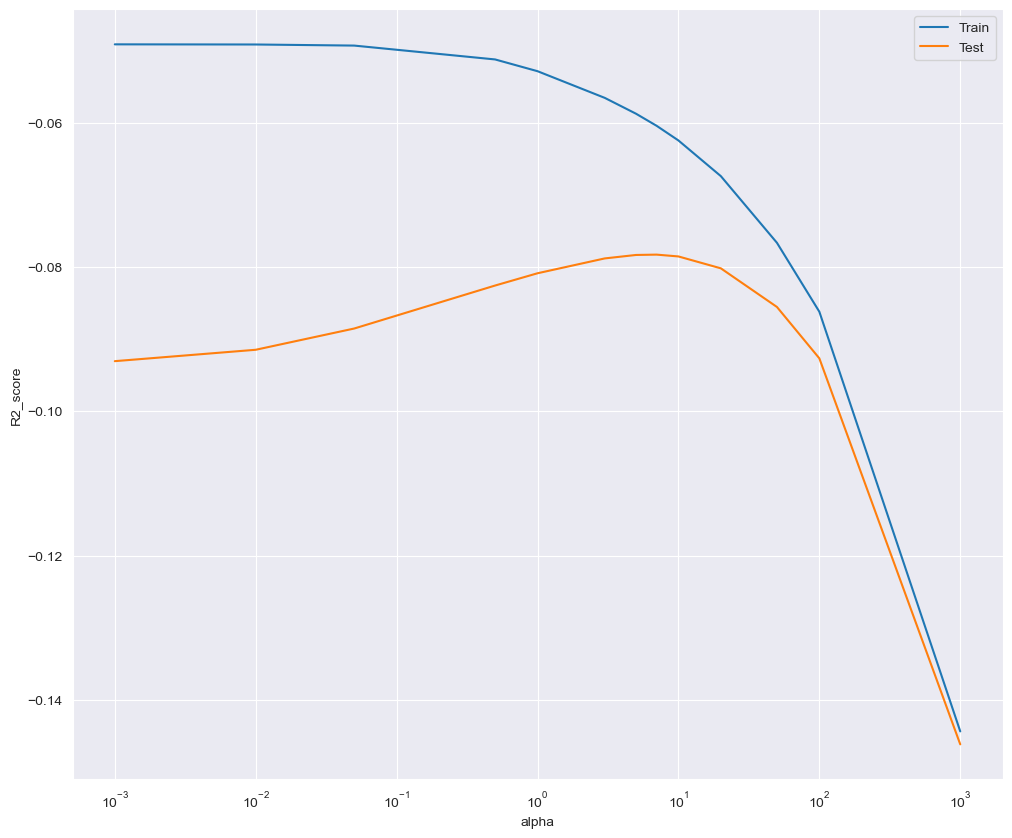

In [77]:
plt.figure(figsize = (12, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

&#x2139; —  **Observations** 
     
#### 📍 Larger values of alpha give a better train & test error.


Error distribution in test dataset


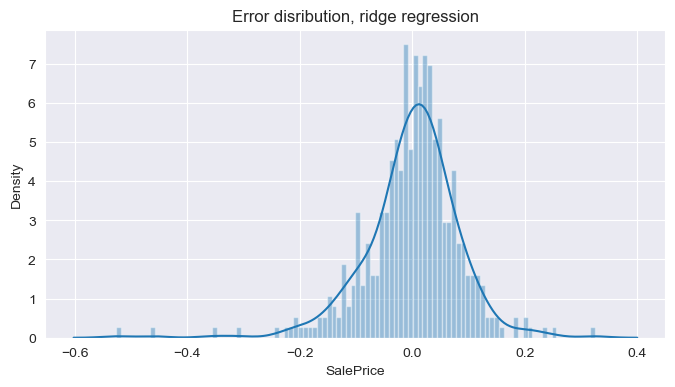

In [78]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
sns.distplot((y_test - y_pred), bins = 100)
plt.title('Error disribution, ridge regression')



plt.subplots_adjust(wspace = .5)

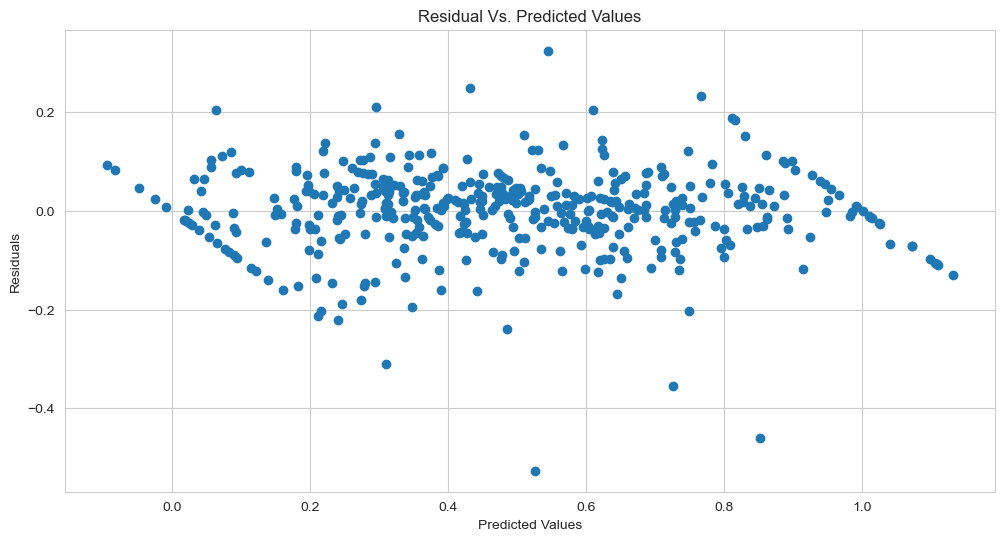

In [79]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
plt.scatter(y_pred, (y_test - y_pred))
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

&#x2139; —  **Note** 
     
📍 The residuals are centered around zero   
📍 There is no visible pattern in the resuiduals



#### Lasso Regression

In [80]:
# Doing GridSearchCV with a range of lambda values

params = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 50.0, 100.0]}

lasso_lv = Lasso()

# Run the cross-validation
lasso_cv = GridSearchCV(estimator = lasso_lv, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
                                   20.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [81]:
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041,0.016,0.001,0.000,0.000,{'alpha': 0.0001},-0.075,-0.091,-0.081,-0.073,...,-0.077,0.009,2,-0.052,-0.053,-0.053,-0.053,-0.054,-0.053,0.001
1,0.020,0.002,0.004,0.006,0.001,{'alpha': 0.0005},-0.071,-0.088,-0.080,-0.072,...,-0.076,0.007,1,-0.066,-0.063,-0.064,-0.066,-0.067,-0.065,0.002
2,0.020,0.005,0.003,0.002,0.001,{'alpha': 0.001},-0.074,-0.092,-0.083,-0.075,...,-0.079,0.007,3,-0.073,-0.069,-0.071,-0.073,-0.074,-0.072,0.002
3,0.011,0.003,0.007,0.008,0.010,{'alpha': 0.01},-0.110,-0.119,-0.111,-0.112,...,-0.113,0.003,4,-0.113,-0.109,-0.111,-0.112,-0.112,-0.111,0.001
4,0.005,0.002,0.001,0.000,0.050,{'alpha': 0.05},-0.217,-0.220,-0.210,-0.208,...,-0.215,0.005,5,-0.214,-0.213,-0.215,-0.215,-0.215,-0.214,0.001
5,0.004,0.002,0.004,0.004,0.500,{'alpha': 0.5},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
6,0.005,0.002,0.001,0.000,1.000,{'alpha': 1.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
7,0.005,0.002,0.001,0.001,4.000,{'alpha': 4.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
8,0.005,0.002,0.001,0.000,5.000,{'alpha': 5.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
9,0.004,0.001,0.001,0.000,6.000,{'alpha': 6.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001


In [82]:
lasso_cv.best_params_

{'alpha': 0.0005}

&#x2139; —  **Note** 
     
📍 Looks like the alpha value of 0.0005 gives the best results.


In [83]:
# Let us build a lasso regression model with alpha of 0.0005
final_lasso_model = Lasso(alpha=0.0005)

In [84]:
final_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0005)

In [85]:
# Predict the values for training set
y_train_pred = final_lasso_model.predict(X_train)

In [86]:
# We have the X_test & y_test already
# Predict the values for test set.
y_pred = final_lasso_model.predict(X_test)


# Let us calculate some metrices for the train & test set.
# These are for the lasso model with alpha of 0.005
lasso_model_metrics=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred)
lasso_model_metrics

,Train,Test
R-Squared,0.938,0.897
RSS,4.618,3.261
MSE,0.005,0.007
RMSE,0.067,0.086


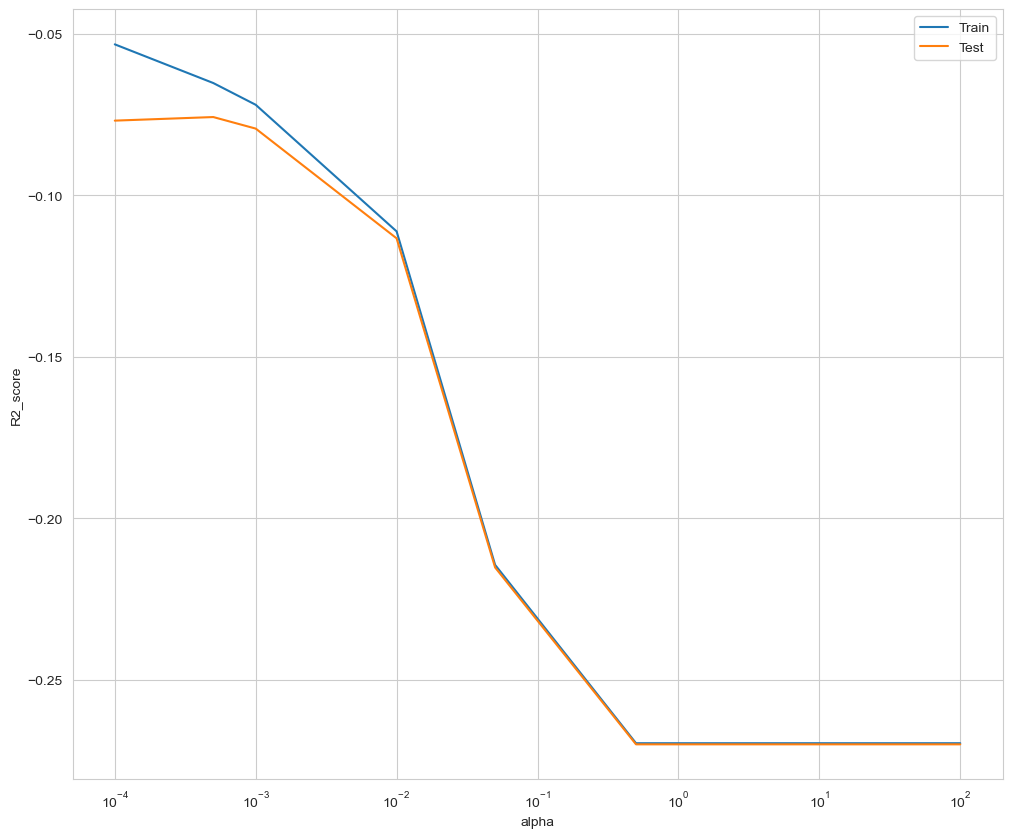

In [87]:
plt.figure(figsize = (12, 10))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Error distribution in test dataset


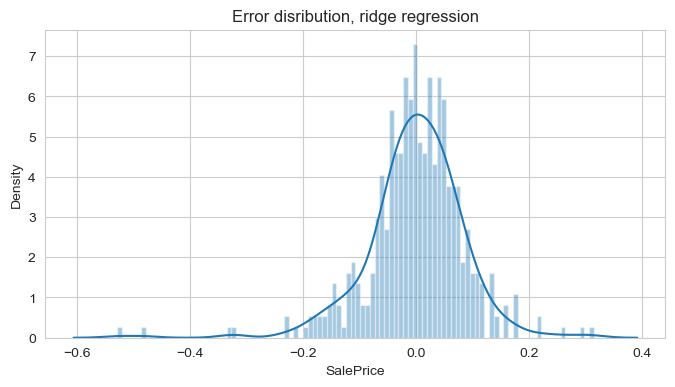

In [88]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
sns.distplot((y_test - y_pred), bins = 100)
plt.title('Error disribution, ridge regression')


plt.subplots_adjust(wspace = .5)

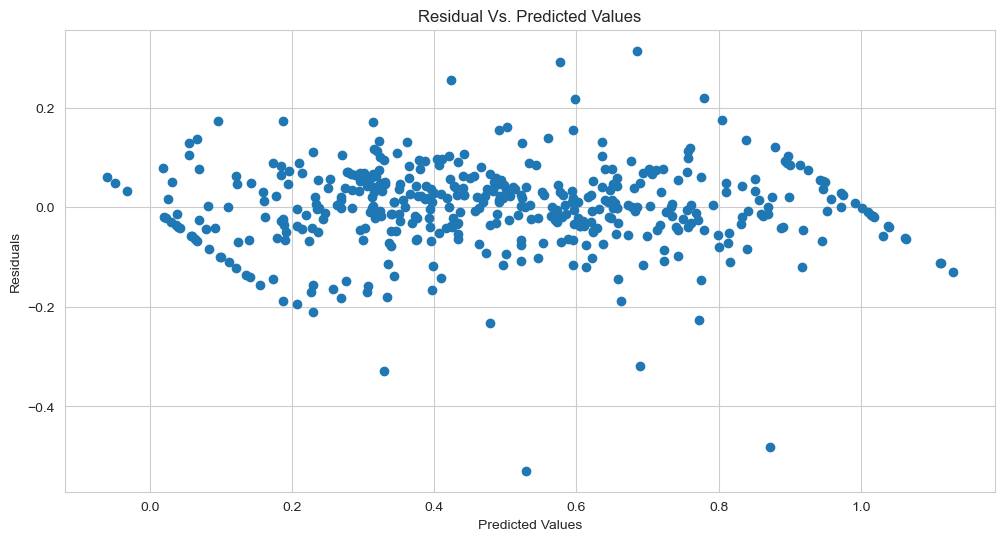

In [89]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
plt.scatter(y_pred, (y_test - y_pred))
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

&#x2139; —  **Note** 
     
📍 The residuals are centered around zero   
📍 There is no visible pattern in the resuiduals



In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, LotFrontage to Age
dtypes: float64(11), int64(22), uint8(255)
memory usage: 740.1 KB


In [91]:
print_top_n_beta_coefficients(5, final_lasso_model, X_train.columns)

                       Beta Coefficients  Absolute
GrLivArea                          0.292     0.292
OverallQual_Excellent              0.133     0.133
TotalBsmtSF                        0.127     0.127
Age                               -0.100     0.100
OverallQual_Very Good              0.099     0.099


In [92]:
# Model Metrics for Lasso
lasso_model_metrics

,Train,Test
R-Squared,0.938,0.897
RSS,4.618,3.261
MSE,0.005,0.007
RMSE,0.067,0.086


In [93]:
# Model Metrics for Ridge
ridge_model_metrics

,Train,Test
R-Squared,0.948,0.899
RSS,3.862,3.199
MSE,0.004,0.007
RMSE,0.062,0.085


&#x2139; **Observations** 
     
📍 The ridge and lasso methods give good r-squared values in train and test   
📍 The r-squared values are also similar.  0.90 for both ridge and lasso.  
📍 The models are not overfitting and the assumptions of linear regression hold for the predictions.    



### Further Analysis Based on Subjective Questions

#### Appendix A

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?     
    
The optimum values of alpha are 0.0005 for lasso & 7.0 for ridge.  Let us try to rebuild models with new alpha values that twice what has been suggested by the ridge & lasso methods.

#### Ridge Regression    
Choosing a value of 10.0 for the alpha.  Let us rebuild the model.

In [94]:
# Let us build a ridge regression model with alpha of 14.0
alternate_ridge_model = Ridge(alpha=14.0)

# Since our Train values are already available and have been normalized, we directly use them to fit.
alternate_ridge_model.fit(X_train, y_train)

Ridge(alpha=14.0)

In [95]:
# Predicting with the models
y_train_pred_alt = alternate_ridge_model.predict(X_train)

# Predict on the test data also
y_pred_alt = final_ridge_model.predict(X_test)

# Let us calculate some metrices for the train & test set.
# These are for the ridge model with alpha of 10.0
ridge_model_metrics_alt=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred_alt, y_test=y_test, y_pred=y_pred_alt)
ridge_model_metrics_alt

,Train,Test
R-Squared,0.942,0.899
RSS,4.323,3.199
MSE,0.004,0.007
RMSE,0.065,0.085


In [96]:
print_top_n_beta_coefficients(5, alternate_ridge_model, X_train.columns)

                       Beta Coefficients  Absolute
GrLivArea                          0.117     0.117
TotalBsmtSF                        0.090     0.090
OverallQual_Very Good              0.077     0.077
OverallQual_Excellent              0.073     0.073
1stFlrSF                           0.073     0.073


#### Lasso Regression    
Choosing a value of 0.001 for the alpha.  Let us rebuild the model.

In [97]:
# Let us build a lasso regression model with alpha of 0.0005
alternate_lasso_model = Lasso(alpha=0.001)

alternate_lasso_model.fit(X_train, y_train)



Lasso(alpha=0.001)

In [98]:
# Predict the values for training set
y_train_pred_alt_lasso = alternate_lasso_model.predict(X_train)

In [99]:
# We have the X_test & y_test already
# Predict the values for test set.
y_pred_alt_lasso = alternate_lasso_model.predict(X_test)


# Let us calculate some metrices for the train & test set.
# These are for the lasso model with alpha of 0.005
alt_lasso_model_metrics=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred_alt_lasso, y_test=y_test, y_pred=y_pred_alt_lasso)
alt_lasso_model_metrics

,Train,Test
R-Squared,0.927,0.886
RSS,5.414,3.610
MSE,0.005,0.008
RMSE,0.073,0.091


In [100]:
print_top_n_beta_coefficients(5, alternate_lasso_model, X_train.columns)

                       Beta Coefficients  Absolute
GrLivArea                          0.301     0.301
TotalBsmtSF                        0.126     0.126
OverallQual_Excellent              0.115     0.115
OverallQual_Very Good              0.094     0.094
Age                               -0.082     0.082


#### Appendix B

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [101]:
print_top_n_beta_coefficients(5, final_lasso_model, X_train.columns)

                       Beta Coefficients  Absolute
GrLivArea                          0.292     0.292
OverallQual_Excellent              0.133     0.133
TotalBsmtSF                        0.127     0.127
Age                               -0.100     0.100
OverallQual_Very Good              0.099     0.099


The top 5 predictors for lasso model that we built are GrLivArea, OverallQual_Excellent, TotalBsmtSF, Age, OverallQual_Very Good


Now let us remove them and build a model again

In [102]:
# Remove the top 5 predictor variables
top_predictors=['OverallQual_Very Good', 'GrLivArea', 'OverallQual_Excellent', 'TotalBsmtSF', 'Age']

In [103]:
# Since the top predictor variables are not available, any dummy variables created for those predictors also have to be removed
# OverallQual is one such predictor.  So we have to remove all the dummy variables associalted with it.

overallqual_dummies = ['OverallQual_Average',
                       'OverallQual_Below Average',
                       'OverallQual_Fair',
                       'OverallQual_Good',
                       'OverallQual_Poor',
                       'OverallQual_Very Excellent',
                       'OverallQual_Very Poor']


In [104]:
X_train_new = X_train.drop(top_predictors, axis=1)
X_test_new = X_test.drop(top_predictors, axis=1)


# Let us drop the overallqual_dummies also
X_train_new = X_train_new.drop(overallqual_dummies, axis=1)
X_test_new = X_test_new.drop(overallqual_dummies, axis=1)


In [105]:
X_test_new.shape

(439, 275)

In [106]:
X_train_new.shape

(1021, 275)

In [107]:
# Doing GridSearchCV with a range of lambda values

params = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 50.0, 100.0]}

lasso_lv_q3 = Lasso()

# Run the cross-validation
lasso_cv_q3 = GridSearchCV(estimator = lasso_lv_q3, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv_q3.fit(X_train_new, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
                                   20.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [108]:
lasso_cv_results_q3 = pd.DataFrame(lasso_cv_q3.cv_results_)
lasso_cv_results_q3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041,0.011,0.001,0.001,0.000,{'alpha': 0.0001},-0.088,-0.098,-0.093,-0.082,...,-0.087,0.008,2,-0.058,-0.059,-0.060,-0.060,-0.061,-0.059,0.001
1,0.018,0.004,0.002,0.001,0.001,{'alpha': 0.0005},-0.079,-0.098,-0.090,-0.080,...,-0.085,0.008,1,-0.072,-0.069,-0.071,-0.072,-0.072,-0.071,0.001
2,0.013,0.002,0.001,0.000,0.001,{'alpha': 0.001},-0.082,-0.101,-0.094,-0.083,...,-0.089,0.007,3,-0.081,-0.077,-0.079,-0.081,-0.081,-0.080,0.002
3,0.010,0.003,0.001,0.000,0.010,{'alpha': 0.01},-0.122,-0.130,-0.122,-0.119,...,-0.124,0.004,4,-0.124,-0.121,-0.121,-0.122,-0.122,-0.122,0.001
4,0.005,0.003,0.001,0.000,0.050,{'alpha': 0.05},-0.217,-0.220,-0.210,-0.208,...,-0.215,0.005,5,-0.214,-0.213,-0.215,-0.215,-0.215,-0.214,0.001
5,0.004,0.002,0.001,0.001,0.500,{'alpha': 0.5},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
6,0.005,0.001,0.001,0.001,1.000,{'alpha': 1.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
7,0.005,0.002,0.001,0.001,4.000,{'alpha': 4.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
8,0.004,0.002,0.001,0.000,5.000,{'alpha': 5.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001
9,0.005,0.002,0.002,0.001,6.000,{'alpha': 6.0},-0.273,-0.274,-0.263,-0.265,...,-0.270,0.005,6,-0.269,-0.269,-0.271,-0.271,-0.268,-0.270,0.001


In [109]:
lasso_cv_q3.best_params_

{'alpha': 0.0005}

In [110]:
# Let us build a lasso regression model with alpha of 0.0005
final_lasso_model_q3 = Lasso(alpha=0.0005)

In [111]:
final_lasso_model_q3.fit(X_train_new, y_train)

Lasso(alpha=0.0005)

In [112]:
# Predict the values for training set
y_train_pred_alt_q3 = final_lasso_model_q3.predict(X_train_new)

In [113]:
# We have the X_test & y_test already
# Predict the values for test set.
y_pred_q3 = final_lasso_model_q3.predict(X_test_new)


# Let us calculate some metrices for the train & test set.
# These are for the lasso model with alpha of 0.005
lasso_model_metrics_q3=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred_alt_q3, y_test=y_test, y_pred=y_pred_q3)
lasso_model_metrics_q3

,Train,Test
R-Squared,0.925,0.893
RSS,5.583,3.368
MSE,0.005,0.008
RMSE,0.074,0.088


In [114]:
print_top_n_beta_coefficients(5, final_lasso_model_q3, X_train_new.columns)

            Beta Coefficients  Absolute
1stFlrSF                0.260     0.260
2ndFlrSF                0.201     0.201
GarageArea              0.100     0.100
Intercept              -0.092     0.092
BsmtFinSF1              0.088     0.088
